In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.9.1


In [63]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import os

In [10]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=np.reshape(x_train, x_train.shape+(1,))
x_test=np.reshape(x_test, x_test.shape+(1,))
print(x_train.shape,x_train.dtype)
print(tf.math.bincount(x_train[0]))
print(tf.reduce_sum(tf.math.bincount(x_train[0])))
x_train, x_test = x_train / 255.0, x_test / 255.0

(60000, 28, 28, 1) uint8
tf.Tensor(
[618   2   3   1   0   0   0   0   0   1   0   3   0   0   1   0   2   0
   5   0   0   0   0   1   1   1   1   1   0   0   1   0   0   0   0   1
   1   0   0   2   0   0   0   1   0   1   1   0   0   1   0   0   0   0
   0   1   1   0   0   0   0   0   0   0   2   0   1   0   0   0   1   0
   0   0   0   0   0   0   1   0   2   2   2   0   0   0   0   0   0   0
   1   0   0   2   1   0   0   0   0   0   0   0   0   0   0   0   0   1
   1   0   0   0   0   0   1   0   0   0   0   1   0   0   0   0   0   0
   1   1   0   0   1   0   1   1   0   1   2   0   0   1   0   0   0   0
   0   0   0   0   1   0   1   0   0   0   3   0   1   0   0   0   1   0
   0   0   0   0   1   0   0   0   1   1   2   0   0   1   0   0   0   0
   0   0   2   1   0   0   1   1   0   0   2   0   0   0   0   2   0   0
   2   0   0   1   0   0   0   1   0   1   0   0   0   0   1   1   0   0
   0   0   0   2   0   1   0   0   0   2   1   0   0   1   0   0   0   0
   0   0   0   

In [31]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(input_shape= [28, 28, 1], kernel_size= 5, filters= 8, strides= 1, 
                   activation= 'relu',  kernel_initializer= 'variance_scaling'),
  tf.keras.layers.MaxPooling2D(pool_size= [2, 2], strides= [2, 2]),
  tf.keras.layers.Conv2D(kernel_size= 5, filters= 16, strides= 1, activation= 'relu', kernel_initializer= 'variance_scaling'),
  tf.keras.layers.MaxPooling2D(pool_size= [2, 2], strides= [2, 2]),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units= 10, kernel_initializer= 'variance_scaling')
])

In [32]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [33]:
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [34]:
model.fit(x_train, y_train, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2270 - accuracy: 0.9348
Epoch 2/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0821 - accuracy: 0.9751
Epoch 3/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0615 - accuracy: 0.9807
Epoch 4/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0502 - accuracy: 0.9841
Epoch 5/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0428 - accuracy: 0.9867
Epoch 6/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0383 - accuracy: 0.9878
Epoch 7/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0338 - accuracy: 0.9895
Epoch 8/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0309 - accuracy: 0.9901
Epoch 9/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0272 - accuracy: 0.9912
Epoch 10/30
1875/1875 [==============================] - 12s 6ms/step - l

In [35]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0597 - accuracy: 0.9882 - 1s/epoch - 3ms/step


[0.05974585562944412, 0.9882000088691711]

In [36]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [55]:
def predict(gray28s, print=False):
    p=probability_model(gray28s)
    if print:
        print(p)
    return np.argmax(p, axis=-1)

6 6


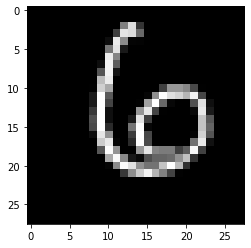

0 0


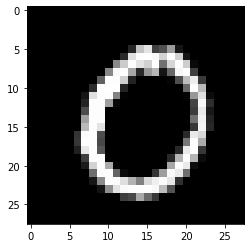

5 5


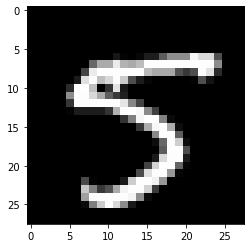

4 4


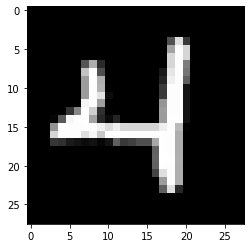

9 9


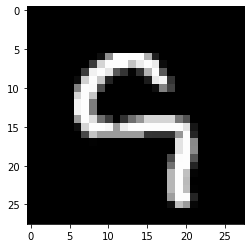

9 9


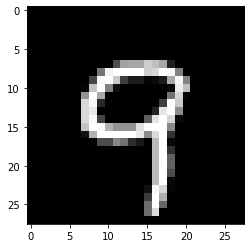

2 2


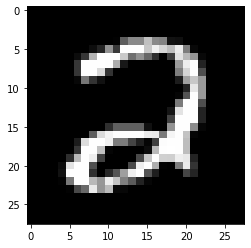

1 1


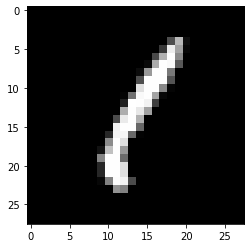

9 9


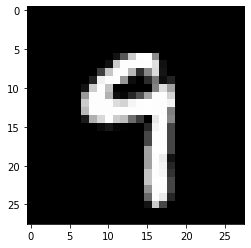

4 4


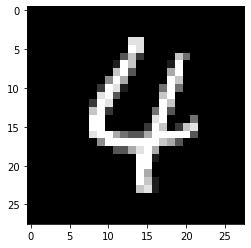

In [57]:
start = 100
v = predict(x_test[start:(start+10)])
for i in range(start,start+10):
    plt.imshow((x_test[i]*255).astype('uint8'), cmap=plt.cm.gray)
    print(y_test[i], v[i-start])
    plt.show()

In [43]:
def mypredict(imgname):
    myimg = cv2.imread(imgname, cv2.IMREAD_UNCHANGED)
    gray = cv2.cvtColor(myimg, cv2.COLOR_BGRA2GRAY)
    gray28 = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
    gray28 = np.reshape(gray28, (28,28,1))
    d = predict(np.array([gray28/255.0]))[0]
    print(imgname, d)

In [44]:
mypredict("b-three-5w.jpg")

tf.Tensor(
[[3.2953371e-23 1.2692146e-10 1.0599801e-08 1.0000000e+00 2.8250805e-21
  8.3100248e-14 7.0443065e-25 1.3442399e-17 1.1702754e-09 1.0498569e-09]], shape=(1, 10), dtype=float32)
b-three-5w.jpg 3


In [58]:
for name in ["b-zero-fat.png","b-one-fat.png","b-two-fat.png","b-three-fat.png","b-four-fat.png","b-five-fat.png","b-six-fat.png","b-seven-fat.png","b-eight-fat.png","b-nine-fat.png"]:
    mypredict(name)

b-zero-fat.png 0
b-one-fat.png 1
b-two-fat.png 2
b-three-fat.png 3
b-four-fat.png 4
b-five-fat.png 5
b-six-fat.png 6
b-seven-fat.png 1
b-eight-fat.png 8
b-nine-fat.png 9


In [62]:
for name in ["four.png", "four.jpg", "seven.jpg","b-seven-fat.png","b-seven-fat-2.png","b-seven-fat-3.png","b-seven-fat-4.png","b-seven-fat-5.png"]:
    mypredict(name)

four.png 3
four.jpg 3
seven.jpg 4
b-seven-fat.png 1
b-seven-fat-2.png 7
b-seven-fat-3.png 7
b-seven-fat-4.png 7
b-seven-fat-5.png 7


In [74]:
for name in ["b-eight.png","b-five-fat.png","b-four-1.png","b-four-fat.png","b-four.png","b-nine-fat-2.png","b-nine-fat-3.png",
    "b-nine-fat-4.png","b-nine-fat-5.png","b-nine-fat.png","b-one-fat.png","b-seven-fat-2.png","b-seven-fat-3.png",
    "b-seven-fat-4.png","b-seven-fat-5.png","b-seven-fat.png","b-six-1.png","b-six-2.png","b-six-fat.png","b-six.png",
    "b-three-fat.png","b-three.png","b-two-fat.png","b-zero-fat.png"]:
    mypredict(name)


b-eight.png 8
b-five-fat.png 5
b-four-1.png 4
b-four-fat.png 4
b-four.png 4
b-nine-fat-2.png 7
b-nine-fat-3.png 9
b-nine-fat-4.png 9
b-nine-fat-5.png 9
b-nine-fat.png 9
b-one-fat.png 1
b-seven-fat-2.png 7
b-seven-fat-3.png 7
b-seven-fat-4.png 7
b-seven-fat-5.png 7
b-seven-fat.png 1
b-six-1.png 6
b-six-2.png 5
b-six-fat.png 6
b-six.png 5
b-three-fat.png 3
b-three.png 3
b-two-fat.png 2
b-zero-fat.png 0
